In [1]:
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
hf_data=pd.read_csv(r'C:\Users\juang\Desktop\projects\capstone2\heart_failure_clinical_records_dataset.csv')
hf_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
hf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
#count missing values
missing = pd.concat([hf_data.isnull().sum(), 100 * hf_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)


,count,%
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


In [5]:
#There are no missing values for any column, which is a very good sign.

70.88541666666667 is the average days of surveilance for people that died
33.522167487684726 is the average days of surveilance for people that survived


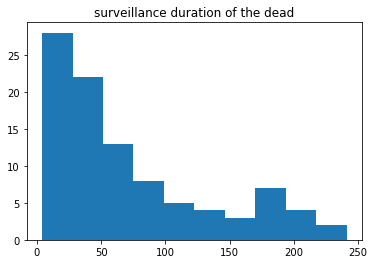

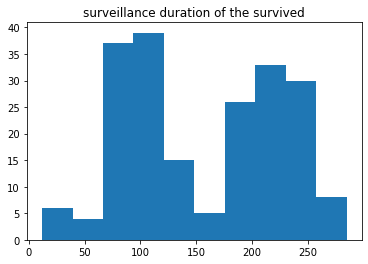

In [11]:
hf_death=[hf_data.time.iloc[i] for i in range(len(hf_data['DEATH_EVENT'])) if hf_data.DEATH_EVENT.iloc[i]==1]
hf_survive=[hf_data.time.iloc[i] for i in range(len(hf_data['DEATH_EVENT'])) if hf_data.DEATH_EVENT.iloc[i]==0]
print(sum(hf_death)/len(hf_death),'is the average days of surveilance for people that died')
print(sum(hf_death)/len(hf_survive),'is the average days of surveilance for people that survived')
plt.hist(hf_death)
plt.title('surveillance duration of the dead')
plt.show()
plt.hist(hf_survive)
plt.title('surveillance duration of the survived')
plt.show()

In [12]:
#drop follow-up time column because it is simply the duration of surveillance after initial heart attack, 
#and is not an attribute of the person; it doesn't seem to provide insightful information.
hf_data.pop('time')
hf_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


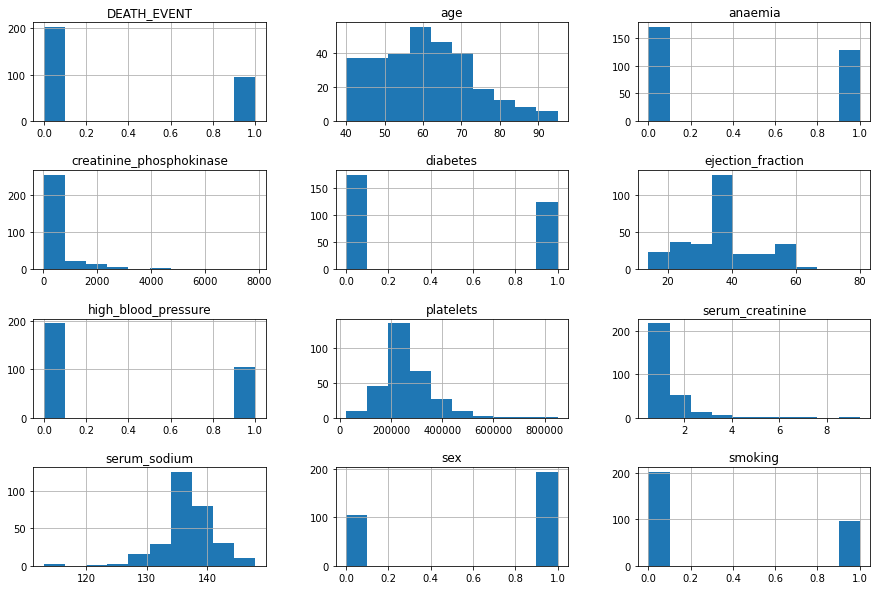

In [13]:
hf_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [14]:
#all the binary columns have values of either 0 or 1, which indicate that there aren't any erroneous entries for those columns.

In [15]:
#high serum creatinine indicate severe kidney damage, while 5+ are outliers, we should keep because most of these people dying
#indicate that it must have high correlation to death event
hf_data[hf_data.serum_creatinine>3].T

,9,10,28,35,48,52,117,124,129,131,203,217,228,282
age,80.0,75.0,58.0,69.0,80.0,60.00,85.0,60.0,53.0,60.0,60.0,54.0,65.0,42.0
anaemia,1.0,1.0,1.0,0.0,1.0,0.00,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
creatinine_phosphokinase,123.0,81.0,60.0,582.0,553.0,3964.00,102.0,582.0,270.0,1082.0,59.0,427.0,56.0,64.0
diabetes,0.0,0.0,0.0,1.0,0.0,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
ejection_fraction,35.0,38.0,38.0,35.0,20.0,62.00,60.0,40.0,35.0,45.0,25.0,70.0,25.0,30.0
high_blood_pressure,1.0,1.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
platelets,388000.0,368000.0,153000.0,228000.0,140000.0,263358.03,507000.0,217000.0,227000.0,250000.0,212000.0,151000.0,237000.0,215000.0
serum_creatinine,9.4,4.0,5.8,3.5,4.4,6.80,3.2,3.7,3.4,6.1,3.5,9.0,5.0,3.8
serum_sodium,133.0,131.0,134.0,134.0,133.0,146.00,138.0,134.0,145.0,131.0,136.0,137.0,130.0,128.0
sex,1.0,1.0,1.0,1.0,1.0,0.00,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [16]:
#there's only 2 people with a serum sodium level of below 120; while they are obvious outliers, there is not enough evidence
#to conclude that they are erroneous entries.
hf_data[hf_data.serum_sodium<120].T

,4,199
age,65.0,60.00
anaemia,1.0,0.00
creatinine_phosphokinase,160.0,1211.00
diabetes,1.0,1.00
ejection_fraction,20.0,35.00
high_blood_pressure,0.0,0.00
platelets,327000.0,263358.03
serum_creatinine,2.7,1.80
serum_sodium,116.0,113.00
sex,0.0,1.00


In [17]:
#creatinine phosphokinase levels of above 3000 indicate many different medical conditions, but once again there is no evidence
#that they are erroneous entries.
hf_data[hf_data.creatinine_phosphokinase>3000].T

,1,52,60,72,103,134,171
age,55.00,60.00,45.0,85.0,42.0,81.00,52.0
anaemia,0.00,0.00,0.0,0.0,0.0,0.00,0.0
creatinine_phosphokinase,7861.00,3964.00,7702.0,5882.0,5209.0,4540.00,3966.0
diabetes,0.00,1.00,1.0,0.0,0.0,0.00,0.0
ejection_fraction,38.00,62.00,25.0,35.0,30.0,35.00,40.0
high_blood_pressure,0.00,0.00,1.0,0.0,0.0,0.00,0.0
platelets,263358.03,263358.03,390000.0,243000.0,226000.0,231000.00,325000.0
serum_creatinine,1.10,6.80,1.0,1.0,1.0,1.18,0.9
serum_sodium,136.00,146.00,139.0,132.0,140.0,137.00,140.0
sex,1.00,0.00,1.0,1.0,1.0,1.00,1.0


In [18]:
#save file
hf_data.to_csv('hf_data_cleaned.csv')